In [14]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
latihan3 = pd.read_csv("../../Data/weather_classification_data.csv")
latihan3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Data Cleaning

In [16]:
# Lihat data yang unik
print(latihan3['Cloud Cover'].unique())
print(latihan3['Season'].unique())
print(latihan3['Weather Type'].unique())
print(latihan3['Location'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']
['inland' 'mountain' 'coastal']


In [17]:
# Drop kolom yang tidak penting
latihan3 = latihan3.drop(['UV Index', 'Visibility (km)', 'Location'], axis=1)
latihan3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,Season,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,Winter,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,Spring,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,Spring,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,Spring,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,Winter,Rainy


In [18]:
# Ubah data kategorikal ke numerikal

replace_map = {
    'Cloud Cover': {'partly cloudy': 0, 'clear': 1, 'overcast': 2, 'cloudy': 3},
    'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3},
    'Weather Type': {'Rainy': 0, 'Cloudy': 1, 'Sunny': 2, 'Snowy': 3}
}

latihan3 = latihan3.replace(replace_map)
latihan3.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_19428\750513926.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  latihan3 = latihan3.replace(replace_map)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,Season,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,0,0
1,39.0,96,8.5,71.0,0,1011.43,1,1
2,30.0,64,7.0,16.0,1,1018.72,1,2
3,38.0,83,1.5,82.0,1,1026.25,1,2
4,27.0,74,17.0,66.0,2,990.67,0,0


In [19]:
latihan3.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
Season                  0
Weather Type            0
dtype: int64

### Analisi Korelasi

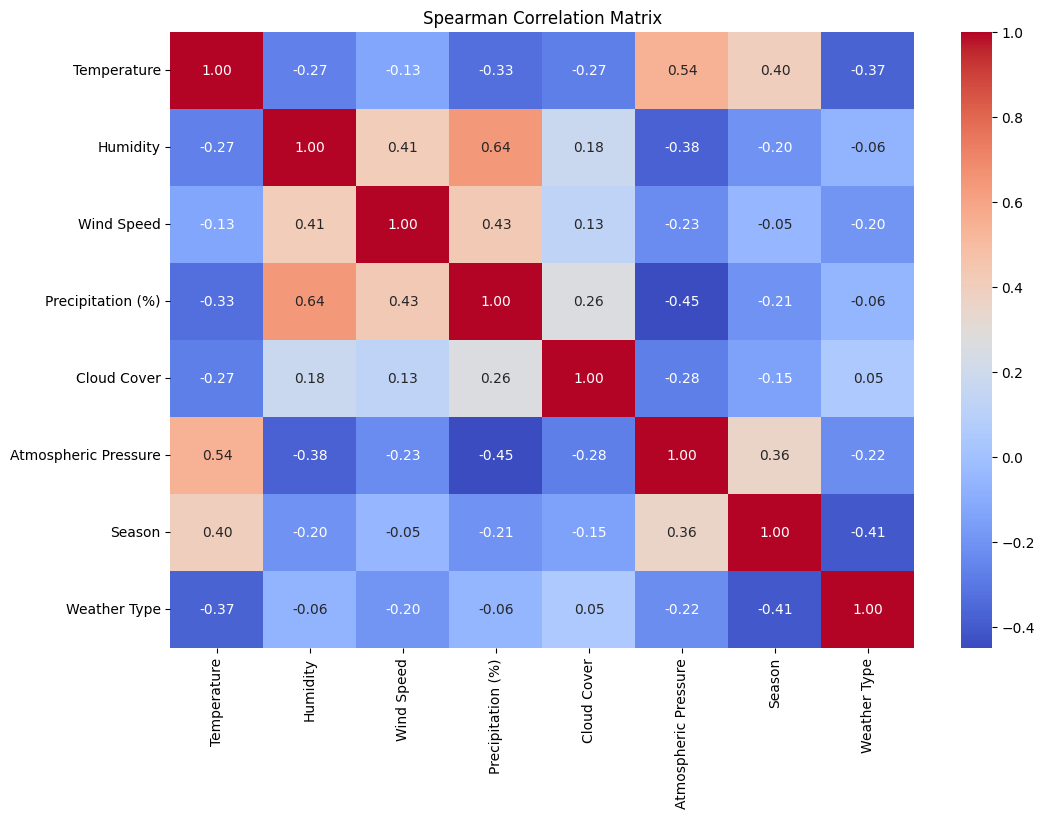

In [20]:
# Menghitung korelasi menggunakan spearman
correlation_matrix = latihan3.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19428\3248324973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather Type', data=latihan3, palette='Set2')


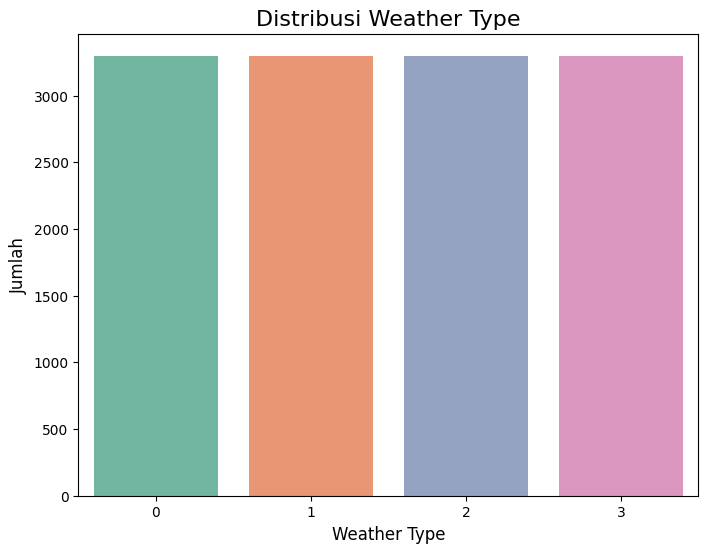

In [21]:
# Diagram Batang untuk Weather Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=latihan3, palette='Set2')
plt.title('Distribusi Weather Type', fontsize=16)
plt.xlabel('Weather Type', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

In [22]:
# Modelling
X = latihan3.drop('Weather Type', axis=1)
y = latihan3['Weather Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
# Testing Model
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40       647
           1       0.00      0.00      0.00       651
           2       0.00      0.00      0.00       641
           3       0.04      0.00      0.01       701

    accuracy                           0.25      2640
   macro avg       0.07      0.25      0.10      2640
weighted avg       0.07      0.25      0.10      2640



c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag